In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import collections

In [2]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores_group_prediction.pkl','rb') as f:
    imp_group = pickle.load(f)

In [20]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores_stage_prediction.pkl','rb') as f:
    imp_stage = pickle.load(f)

In [4]:
len(imp_group)

140

In [21]:
scl = imp_stage[0] # look at dataframe for first graph

In [22]:
scl

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,77.0,589.0,0,0,0.000000,0.000000,0.0,0.000000,0.00000,0.086678,0.0,0.000000,0.000000,0.000000,0.000000,0.015602
1,granulocytes,106.0,826.0,1,0,0.205527,0.076950,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.004025,0.060734,0.000000,0.047808
2,granulocytes,107.0,545.0,2,0,0.012644,0.171711,0.0,0.061048,0.00000,0.048164,0.0,0.000000,0.124192,0.095211,0.030404,0.049395
3,granulocytes,98.0,564.0,3,0,0.000000,0.000000,0.0,0.008977,0.00000,0.079265,0.0,0.000000,0.005902,0.000000,0.000000,0.013970
4,granulocytes,217.0,329.0,4,0,0.000000,0.000000,0.0,0.000000,0.00000,0.070130,0.0,0.011328,0.000000,0.000000,0.000000,0.013033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,undefined,1686.0,503.0,240084,0,0.000000,0.000000,0.0,0.013270,0.00000,0.075089,0.0,0.000000,0.022157,0.000000,0.000000,0.015472
1160,undefined,1868.0,553.0,240085,0,0.000000,0.099012,0.0,0.064703,0.00000,0.012110,0.0,0.000000,0.037635,0.026430,0.006055,0.026365
1161,tumor cells / immune cells,1310.0,135.0,246598,0,0.000000,0.000000,0.0,0.000000,0.03563,0.089043,0.0,0.000000,0.000000,0.000000,0.000000,0.019948
1162,immune cells / vasculature,1634.0,1242.0,248395,0,0.063656,0.137270,0.0,0.069655,0.00000,0.000000,0.0,0.000000,0.135740,0.164500,0.031828,0.057082


### Find kNN of each important cell and use them as neighborhoods

In [7]:
df = pd.read_csv(DATA_PATH+'CRC_master.csv')

In [8]:
cell_type_dict = {}
for i,cell_type in enumerate(df.ClusterName.unique()):
    cell_type_dict[cell_type] = i

In [9]:
spots = df['spots'].unique()

In [10]:
pt_data = pd.read_excel(DATA_PATH+'CRC_TMAs_patient_annotations.xlsx')

/home/joeleliason/anaconda3/envs/hactnet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [28]:
spots

array(['1_A', '1_B', '2_A', '2_B', '3_A', '3_B', '4_A', '4_B', '5_A',
       '5_B', '6_A', '6_B', '7_A', '7_B', '8_A', '8_B', '9_A', '9_B',
       '10_A', '10_B', '11_A', '11_B', '12_A', '12_B', '13_A', '13_B',
       '14_A', '14_B', '15_A', '15_B', '16_A', '16_B', '17_A', '17_B',
       '18_A', '18_B', '19_A', '19_B', '20_A', '20_B', '21_A', '21_B',
       '22_A', '22_B', '23_A', '23_B', '24_A', '24_B', '25_A', '25_B',
       '26_A', '26_B', '27_A', '27_B', '28_A', '28_B', '29_A', '29_B',
       '30_A', '30_B', '31_A', '31_B', '32_A', '32_B', '33_A', '33_B',
       '34_A', '34_B', '35_A', '35_B', '36_A', '36_B', '37_A', '37_B',
       '38_A', '38_B', '39_A', '39_B', '40_A', '40_B', '41_A', '41_B',
       '42_A', '42_B', '43_A', '43_B', '44_A', '44_B', '45_A', '45_B',
       '46_A', '46_B', '47_A', '47_B', '48_A', '48_B', '49_A', '49_B',
       '50_A', '50_B', '51_A', '51_B', '52_A', '52_B', '53_A', '53_B',
       '54_A', '54_B', '55_A', '55_B', '56_A', '56_B', '57_A', '57_B',
       '

In [53]:
def get_nbhds(df_list):
    spots_nbhds = []
    total_nbhds = 0
    nn = 10
    threshold = 0.3
    n_impcells = 50
    all_cell_types = df.ClusterName.unique().tolist()
    patient_id = 0
    for i,scl in enumerate(df_list):
        spot_id = scl.spot_id.unique()[0]
        # print(spot_id)
        spot_id = spots[spot_id]
        X = scl.loc[:,'X':'Y'].values
        knn = NearestNeighbors(n_neighbors=nn)
        knn.fit(X)
        important_cells = scl[(scl['campp_median'] >= threshold) & (scl['cell_type'] != 'dirt')]
        # important_cells = scl[(scl['cell_type'] != 'dirt')].nlargest(n_impcells
        imp_cell_coord = important_cells.loc[:,'X':'Y'].values
        num_nbhds = imp_cell_coord.shape[0]
        total_nbhds += num_nbhds
        if num_nbhds == 0:
            # spots_nbhds[spot_id] =[]
            continue
        knn_important = knn.kneighbors(imp_cell_coord, return_distance=False).tolist()
        nbhd_cell_types = []
        for cells in knn_important:
            nbhd_cell_types.append([cell_type for cell_type in scl.iloc[cells]['cell_type'].values.tolist()])
        counts = [collections.Counter(s) for s in nbhd_cell_types]
        spots_nbhds_df = pd.DataFrame(0, index=[i for i in range(num_nbhds)], columns=['patient_group','patient_stage','patient_id','spot_id','centroid_X','centroid_Y'] + all_cell_types)
        spots_nbhds_df.loc[:,all_cell_types[0]:all_cell_types[-1]] = np.array([[counter[ct] for ct in all_cell_types] for counter in counts])
        spots_nbhds_df.loc[:,'spot_id'] = spot_id
        if i % 4 == 0:
            patient_id += 1
        spots_nbhds_df.loc[:,'patient_id'] = patient_id
        cp = pt_data.loc[pt_data.loc[:,'Patient'] == patient_id,'Group'].values[0]
        assert(cp == 1 or cp == 2)
        spots_nbhds_df.loc[:,'patient_group'] = cp
        cp = pt_data.loc[pt_data.loc[:,'Patient'] == patient_id,'cp_TNM_Simple'].values[0]
        assert(cp == 3 or cp == 4)
        spots_nbhds_df.loc[:,'patient_stage'] = cp
        spots_nbhds_df.loc[:,'centroid_X':'centroid_Y'] = [scl.iloc[cells].loc[:,'X':'Y'].values.mean(axis=0) for cells in knn_important]
        # spots_nbhds[spot_id] = {
        #     'nbhd_cell_types': np.array([[counter[ct] for ct in all_cell_types] for counter in counts]),
        #     'nbhd_coords': imp_cell_coord
        # }
        spots_nbhds.append(spots_nbhds_df)
    nbhds_df = pd.concat(spots_nbhds,ignore_index=True)
    return nbhds_df

In [54]:
nbhds_df_group = get_nbhds(imp_group)

In [55]:
nbhds_df_stage = get_nbhds(imp_stage)

In [49]:
nbhds_df_group.patient_group.value_counts()

2    1652
1     859
Name: patient_group, dtype: int64

In [50]:
nbhds_df_group

,patient_group,patient_stage,patient_id,spot_id,centroid_X,centroid_Y,granulocytes,vasculature,CD4+ T cells CD45RO+,tumor cells,...,immune cells,NK cells,nerves,CD68+ macrophages GzmB+,CD68+ macrophages,lymphatics,CD11b+ monocytes,CD4+ T cells GATA3+,CD163+ macrophages,CD3+ T cells
0,1,3.0,1,1_A,239.100006,317.000000,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3.0,1,1_A,257.899994,309.200012,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3.0,1,1_A,478.200012,326.100006,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1,1_A,504.299988,1258.300049,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3.0,1,1_A,528.000000,1300.199951,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,1,3.0,35,70_B,362.100006,186.199997,0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
2507,1,3.0,35,70_B,386.600006,170.300003,0,1,2,7,...,0,0,0,0,0,0,0,0,0,0
2508,1,3.0,35,70_B,356.000000,157.000000,0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
2509,1,3.0,35,70_B,395.500000,195.500000,1,1,1,6,...,0,0,0,0,0,0,0,0,0,0


Roughly twice as many important neighborhoods for group 2 than in group 1

In [42]:
nbhds_df_stage.patient_group.value_counts()

2    6864
1    4774
Name: patient_group, dtype: int64

In [43]:
nbhds_df_group.to_csv(DATA_PATH+'nbhds_df_group.csv',index=False)

In [44]:
nbhds_df_stage.to_csv(DATA_PATH+'nbhds_df_stage.csv',index=False)

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = nbhds_df.drop(['patient_id','spot_id','centroid_X','centroid_Y'],axis=1).values

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=2.0, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [52]:
X

array([[ 0.74919509, -0.38964127, -0.40416676, ..., -0.04466779,
        -0.01996012, -0.03994412],
       [ 0.74919509, -0.38964127, -0.40416676, ..., -0.04466779,
        -0.01996012, -0.03994412],
       [ 0.74919509, -0.38964127,  0.56329056, ..., -0.04466779,
        -0.01996012, -0.03994412],
       ...,
       [-0.45904439,  0.57239338,  1.53074787, ..., -0.04466779,
        -0.01996012, -0.03994412],
       [ 0.14507535,  0.57239338,  0.56329056, ..., -0.04466779,
        -0.01996012, -0.03994412],
       [ 0.14507535,  0.57239338,  0.56329056, ..., -0.04466779,
        -0.01996012, -0.03994412]])

In [53]:
labels

array([ 0,  0, -1, ..., -1,  0,  3])

In [54]:
n_clusters_

8

In [55]:
n_noise_

831

In [56]:
len(labels)

2511

### HDBSCAN

In [68]:
import hdbscan
from sklearn.preprocessing import StandardScaler


In [263]:
ptgroup_map = {1:20,2:40}
patient_group = 1
# X = nbhds_df_group[nbhds_df_group['patient_group'] == patient_group].drop(['patient_stage','patient_group','patient_id','spot_id','centroid_X','centroid_Y'],axis=1).values
# X = X / 10
# X = StandardScaler().fit_transform(X)
X = nbhds_df_group.drop(['patient_stage','patient_group','patient_id','spot_id','centroid_X','centroid_Y'],axis=1).values


In [264]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True)
clusterer.fit(X)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=20)

In [265]:
max(clusterer.labels_)

10

In [266]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([1606,   28,   57,   58,  150,  152,   38,   26,   77,   25,   38,
         256]))

<AxesSubplot:ylabel='$\\lambda$ value'>

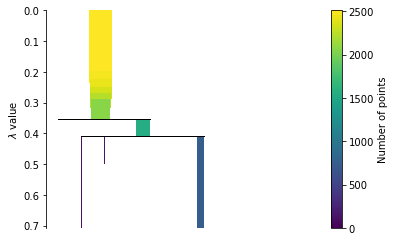

In [267]:
clusterer.condensed_tree_.plot()

/home/joeleliason/anaconda3/envs/hactnet/lib/python3.7/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<AxesSubplot:ylabel='$\\lambda$ value'>

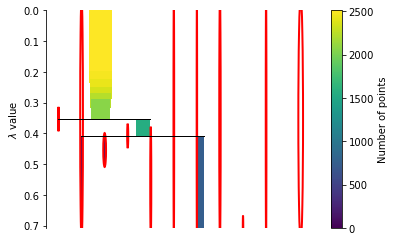

In [268]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [269]:
labs = clusterer.labels_

In [270]:
centroids = []
for lab in range(max(labs)+1):
    if lab == -1:
        continue
    idx = np.where(labs == lab)[0]
    centroids.append(X[idx,:].mean(axis=0))

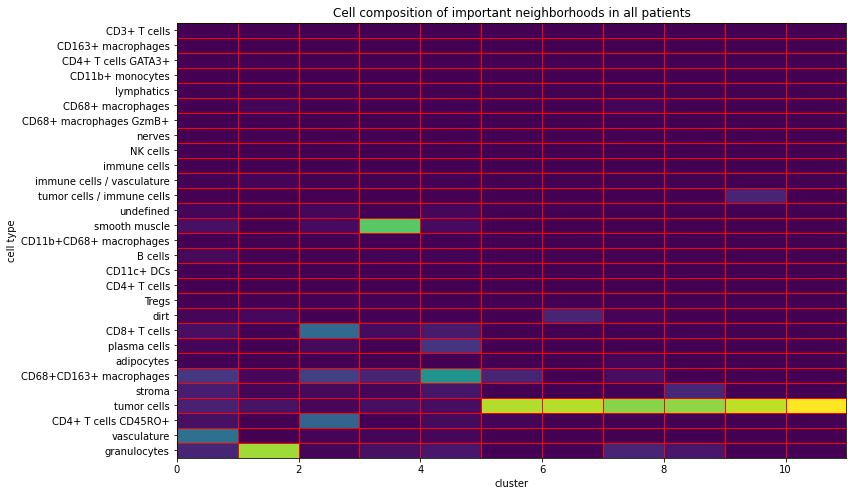

In [271]:
cols = nbhds_df_group.drop(['patient_stage','patient_group','patient_id','spot_id','centroid_X','centroid_Y'],axis=1).columns
fig,ax = plt.subplots(figsize=(12,8))
ax.pcolormesh(np.array(centroids).T, edgecolor='red')
ax.set_yticks(np.arange(len(cols))+0.5)
ax.set_yticklabels(cols)
ax.set_xlabel('cluster')
ax.set_ylabel('cell type')
ax.set_title(f'Cell composition of important neighborhoods in all patients')
plt.savefig(DATA_PATH+f'cell_comp_group_all.png')
plt.show()

#### Stability based cluster evaluation

In [120]:
# from reval.best_nclust_cv import FindBestClustCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from reval.param_selection import ParamSelection

params = {'s': {'n_neighbors': [5, 15]},
          'c': {'min_cluster_size': [10,20,30]}}
parsel = ParamSelection(params, cv=2, s=KNeighborsClassifier(), c=hdbscan.HDBSCAN(),
                        nrand=10,
                        n_jobs=4,
                        iter_cv=10)

In [121]:
parsel.fit(X)

09:40:49, INFO Running 6 combinations of parameters...

09:42:50, INFO Best solution(s):
09:42:50, INFO Parameters classifier (S): n_neighbors=5
09:42:50, INFO Parameters clustering (C): min_cluster_size=30
09:42:50, INFO Validation performance: (0.46515847710931224, (0.46515847710931224, 0.23601203317159036))
09:42:50, INFO N clusters: 2



### Correlation

In [276]:
def cor_sel(sliced,threshold=0.2,breadth=1):
    X = sliced.drop(['patient_stage','patient_group','patient_id','spot_id','centroid_X','centroid_Y'],axis=1)

    correlation_matrix = X.corr()
    threshold = 0.2
    breadth = 1
    correlation_matrix_filter = correlation_matrix.copy()
    np.fill_diagonal(correlation_matrix_filter.values,0)
    # filter <- apply(correlation_matrix_filter,1, function(x) sum(abs(x) >= threshold,na.rm = T))
    filt = correlation_matrix_filter.apply(lambda x: np.nansum(np.abs(x) >= threshold))
    sel = np.where(filt >= breadth)[0]
    corr = correlation_matrix.iloc[sel,sel]

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.savefig(DATA_PATH+f'nbhd_corr_spot_{spot}.png')
    plt.show()

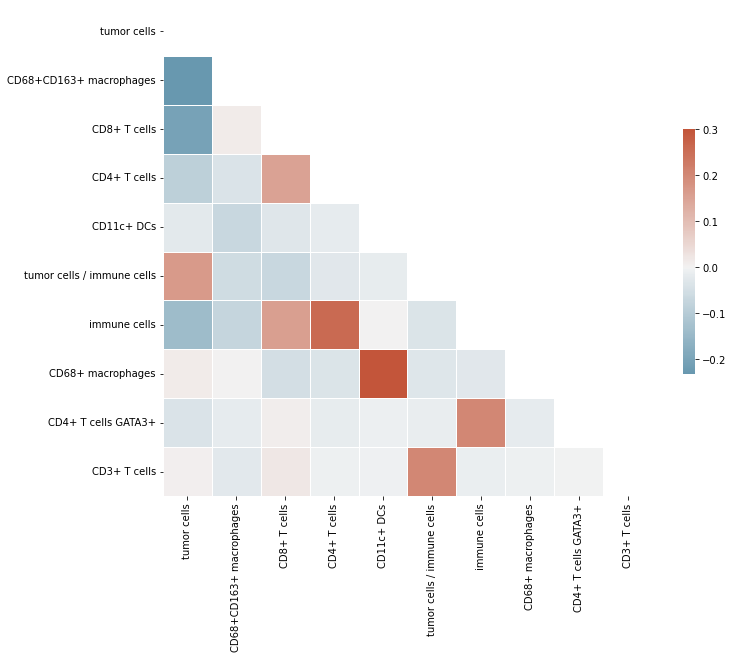

In [274]:
patient_group = 1
sliced = nbhds_df_group[nbhds_df_group['patient_group'] == patient_group]
cor_sel(sliced)

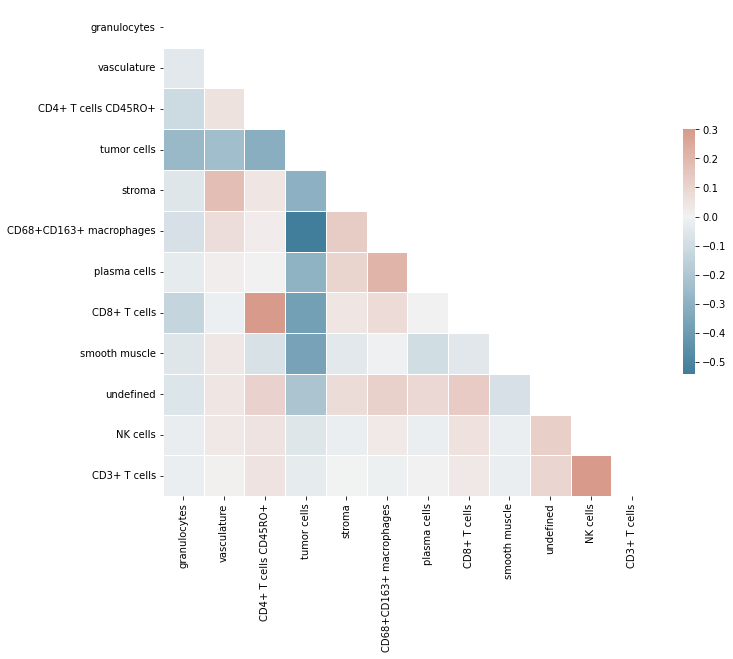

In [275]:
patient_group = 2
sliced = nbhds_df_group[nbhds_df_group['patient_group'] == patient_group]
cor_sel(sliced)

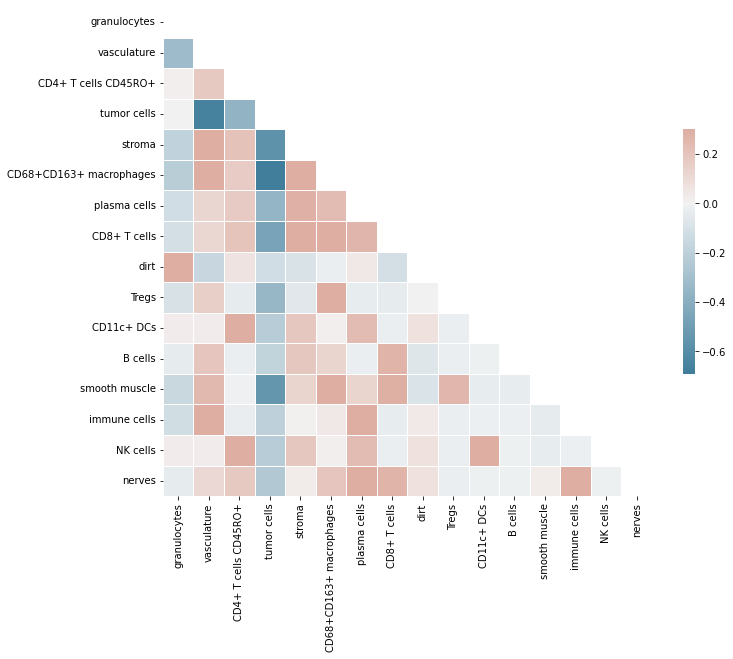

In [63]:
sliced = nbhds_df_stage[nbhds_df_stage['patient_id'] == 1]
cor_sel(sliced)

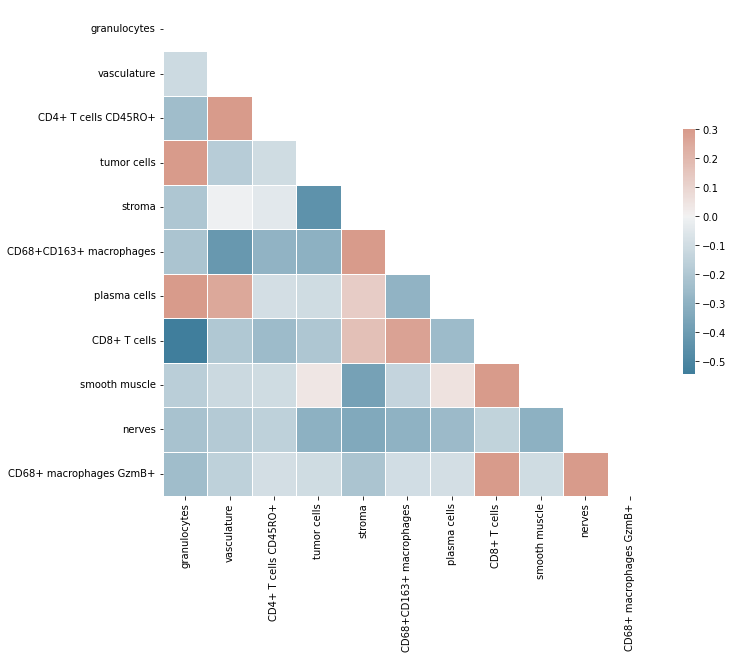

In [278]:
spot = '26_B'
sliced = nbhds_df_group[nbhds_df_group['spot_id'] == spot]
cor_sel(sliced)

~~Correlations - done~~

~~Cluster communities and then look at correlations - TBD~~

ANOVA of median campp scores and pairwise comparisons plot - across whole df, patient groups, individual patient and individual spot

heteroscedasticity plot